# Tutorial 01: Simulating agglomeration

## Table of Contents
1. [Introduction](#Introduction)
2. [Generating MCAC input file](#Input)
3. [Running MCAC](#run)
4. [Open output data](#output)
    1. [Open the "advancement.dat" file](#advancement)

## 1. Introduction <a class="anchor" id="Introduction"></a>

This is an introductory tutorial to Monte Carlo Aggregation Code (MCAC) simulations. I this tutorial we will simulate the agglomeration of nanoparticles in a cubic domain with periodic boundary conditions. The simulation start with a total of 500 spherical primary particles of polydisperse size (lognormal distriution; diameter geometric std=1.2 and geometric mean=20 nm). The particle volume fraction is 100 ppm, and thermodynamic conditions are T=1700 K and P=101.3 kPa. Particle's bulk density is 1.8 g/cm$^3$ The simulation is stopped when there is only one agglomerate remaining in the system.

## 2. Generating MCAC input file <a class="anchor" id="Input"></a>

In [1]:
import configparser

MCAC input parameters should be provided as a ".ini" file. To generate such a files in Python you need to install and import the library "configparser" however, such an input file could be also generated manually.

As you will see below, ".ini" files allow a clear and ordered input file to be created. If you forget one of these parameters, there are two possible outcomes:
 * MCAC input error is raised when values are out of possible range or not provided.
 * MCAC is running based on default values.

<div class="alert alert-block alert-warning">
    <b>Becareful:</b> You have to be aware of MCAC input units. As a default criteria you should use SI units but always check them because there are some exceptions. To check units and default values, please refer to: MCAC/src/physical_model/physical_model.cpp. Also, once you run the code, it will show you all the input parameters.
</div>

In [2]:
# Parameters

simulation_name = "Tutorial_01"

## environment
pressure = 101300
temperature = 1700
volume_fraction = 100e-06

## monomers
density = 1800
initialisation_mode = 'lognormal'
dispersion_diameter = 1.2
mean_diameter = 20
number = 500

## limits
number_of_aggregates_limit = 1

## numerics
pick_method = 'random'
with_domain_duplication = 'false'

## output
n_time_per_file = 5000
output_dir = simulation_name + "_output"
write_between_event_frequency = 100000000
write_events_frequency = 1

In [3]:
config = configparser.ConfigParser()
config['environment'] = {'pressure': str(pressure),
                         'temperature': str(temperature),
                         'volume_fraction': str(volume_fraction)}
config['monomers'] = {'density': str(density),
                      'dispersion_diameter': str(dispersion_diameter),
                      'initialisation_mode': initialisation_mode,
                      'mean_diameter': str(mean_diameter),
                      'number': str(number)}
config['limits'] = {'number_of_aggregates_limit': str(number_of_aggregates_limit)}

config['numerics'] = {'pick_method': pick_method,
                      'with_domain_duplication': with_domain_duplication}
config['output'] = {'n_time_per_file': str(n_time_per_file),
                    'output_dir': output_dir,
                    'write_between_event_frequency': str(write_between_event_frequency),
                    'write_events_frequency': str(write_events_frequency)}

with open(simulation_name+'.ini', 'w') as configfile:
    config.write(configfile)
print("Input file saved as: "+simulation_name+'.ini')

Input file saved as: Tutorial_01.ini


If you open this file, you should see something like this:
![01_tutorial_ini](https://github.com/josecmoranc/josecmoranc.github.io/assets/62391931/879f0f27-e8d4-49a7-8e3a-c45746c9a26a)

## 3. Running MCAC <a class="anchor" id="run"></a>

Now, using our ".ini" file we will run MCAC in a terminal. You should go to the directory where MCAC has been installed, open a terminal and type: **bin/Release/MCAC Tutorial_01.ini**. In this case, the ".ini" file has been pasted in the same directory of MCAC, you may alternatively provide the direcory of your ".ini" file when runing MCAC.
![01_tutorial_MCAC1](https://github.com/josecmoranc/josecmoranc.github.io/assets/62391931/e77c71a7-8679-458b-8378-59e9469315a2)

As you can see in this image, MCAC is showing all the input parameters that has read from our ".ini" file and indicates the units of each one. You can note that additional parameters are shown, some of them are taken as default values (such as dfe and kfe) and some of them are determined based on the provided data (e.g., fluid viscosity). 

Subsequently, the code will show you all the *events* (an event can be a contact between particles, aggregation or merge, and others to be discussed in later tutorials) identified during the simulation as a function of time as shown in the image below. Now we have just to wait until the code has finished the simulation.

![01_tutorial_MCAC2](https://github.com/josecmoranc/josecmoranc.github.io/assets/62391931/48ca6eb8-6a2f-48ef-ace4-b04aa4fd0b5b)

Once the simulation is finished, the code will indicate where the output files are saved. If you indicated a directory in the input file, then the output data should be saved there:
![01_tutorial_MCAC3](https://github.com/josecmoranc/josecmoranc.github.io/assets/62391931/e611221d-9ac1-4dfa-91c3-db0c348dbb05)

## 4. Open output data <a class="anchor" id="output"></a>

The output data looks like this:
![01_tutorial_MCAC4](https://github.com/josecmoranc/josecmoranc.github.io/assets/62391931/eacb5033-aeb3-4d5d-84e1-a9b2ed48afb0)

You can note the different types of files:
* **advancement.dat:** Contains certain global information of the simulation as a function of time. It allows a fast post-processing check of the progress of the simulation.
* **params.ini:** This is a copy of the input parameter file. It is useful to check later that you correctly simulated this case, ease post-processing, and remember the parameters of this simulation.
* **Aggregats_...** and **Spheres_...** Contain all the information of aggregates and primary spheres, respectively.

### 4.1. Open the "advancement.dat" file <a class="anchor" id="advancement"></a>

In [4]:
from TutorialTools import import_physical_model

In [5]:
physical_model = import_physical_model(output_dir+"/advancement.dat")
physical_model.head()

,Nagg,fv,np_avg,T,box_volume,Npp,u_sg,J_nuc
time,,,,,,,,
0.000000e+00,2.055640e+19,0.0001,1.00000,1700.0,2.432330e-17,2.055640e+19,0.0,0.0
1.495510e-08,2.051530e+19,0.0001,1.00200,1700.0,2.432330e-17,2.055640e+19,0.0,0.0
3.276270e-08,2.047420e+19,0.0001,1.00402,1700.0,2.432330e-17,2.055640e+19,0.0,0.0
4.106260e-08,2.043310e+19,0.0001,1.00604,1700.0,2.432330e-17,2.055640e+19,0.0,0.0
4.697160e-08,2.039200e+19,0.0001,1.00806,1700.0,2.432330e-17,2.055640e+19,0.0,0.0


In this version of MCAC, this file contains the following information:
* **time:** The residence time.
* **Nagg:** The number concentration of aggregates in the domain.
* **fv:** The volume fraction.
* **np_avg:** The average number of monomers per aggregate.
* **T:** The temperature.
* **box_volume:** The volume of the simulation domain.
* **Npp:** The number concentration of monomers in the domain.
* **u_sr:** The surface reactions rate.
* **J_nuc:** Nucleation flux (1/m$^3$/s).

Please note that most of these properties are macroscopic variables that are physically meaningful when the population of particles in the system is statistically significant (in this tutorial a small amount of particles is preferred to run the code fast however, it does not allow physical interpretation).

Now we plot **Nagg** and **Npp** as a function of time as an example:

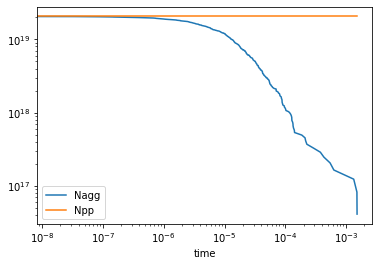

In [10]:
physical_model[["Nagg","Npp"]].plot(loglog=True)